In [ ]:
#Importing Necessary packages and importing data from kaggle using API 
import tensorflow as tf
import numpy as np # For numerical calculations
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
os.environ['KAGGLE_USERNAME'] = "vineethai" # username from the json file
os.environ['KAGGLE_KEY'] = "b83dc13a9990fd4b6c7956d6ea6d03eb" # key from the json file
!kaggle datasets download -d saurabhshahane/barkvn50

barkvn50.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzipping imported file
from zipfile import ZipFile

file_name = "/content/barkvn50.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
base_dir=r"/content/BarkVN-50/BarkVN-50_mendeley" # Setting up base directory of the data

In [ ]:
# setting batch and image size 
IMAGE_SIZE=224      
BATCH_SIZE=64


In [ ]:
# Generating Testing and Trainind dataset and creating new data by chagining its properties
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 5039 images belonging to 50 classes.
Found 539 images belonging to 50 classes.


In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(331,331,3)
                     )
 
base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.
 
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(400, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(50, activation='softmax')
    ])

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy']) # using adam optimizer and catogerical crossentropy as loss function 

In [ ]:
model.summary() # Model Architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 9, 9, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_406 (Ba  (None, 9, 9, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [ ]:
his = model.fit(train_datagen,epochs=30,validation_data=test_datagen) #Training model 

Epoch 1/30
79/79 [==============================] - 93s 888ms/step - loss: 2.9201 - accuracy: 0.2616 - val_loss: 1.8269 - val_accuracy: 0.5158
Epoch 2/30
79/79 [==============================] - 70s 881ms/step - loss: 1.6237 - accuracy: 0.5473 - val_loss: 1.3278 - val_accuracy: 0.6382
Epoch 3/30
79/79 [==============================] - 65s 825ms/step - loss: 1.1826 - accuracy: 0.6559 - val_loss: 1.0147 - val_accuracy: 0.7124
Epoch 4/30
79/79 [==============================] - 65s 827ms/step - loss: 0.9453 - accuracy: 0.7242 - val_loss: 0.9752 - val_accuracy: 0.7477
Epoch 5/30
79/79 [==============================] - 65s 826ms/step - loss: 0.7991 - accuracy: 0.7587 - val_loss: 0.9020 - val_accuracy: 0.7532
Epoch 6/30
79/79 [==============================] - 65s 825ms/step - loss: 0.7100 - accuracy: 0.7865 - val_loss: 0.8471 - val_accuracy: 0.7792
Epoch 7/30
79/79 [==============================] - 66s 827ms/step - loss: 0.6251 - accuracy: 0.8121 - val_loss: 0.8634 - val_accuracy: 0.7737

In [ ]:
h= his.history 
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss vs Accuracy')

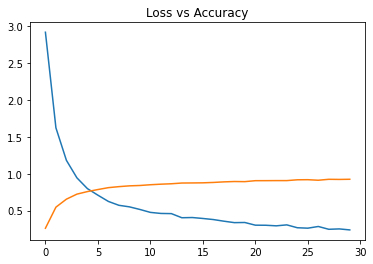

In [ ]:
#Plotting Accuracy graph 
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['accuracy'])
plt.title("Loss vs Accuracy")

In [ ]:
#initializing catergory as list 
classes=['Acacia','Adenanthera microsperma','Adenium species','Anacardium occidentale','Annona squamosa','Artocarpus altilis','Artocarpus heterophyllus','Barringtonia acutangula','Cananga odorata','Carica papaya','Casuarina equisetifolia','Cedrus','Chrysophyllum cainino','Citrus aurantiifolia','Citrus grandis','Cocos nucifera','Dalbergia oliveri','Delonix regia','Dipterocarpus alatus','Erythrina fusca','Eucalyptus','Ficus microcarpa','Ficus racemosa','Gmelina arborea Roxb','Hevea brasiliensis','Hopea','Khaya senegalensis','Khaya senegalensis A.Ju','Lagerstroemia speciosa','Magnolia alba','Mangifera','Melaleuca','Melia azedarach','Musa','Nephelium lappaceum','Persea','Polyalthia longifolia','Prunnus','Prunus salicina','Psidium guajava','Pterocarpus macrocarpus','Senna siamea','Spondias mombin L','Syzygium nervosum','Tamarindus indica','Tectona grandis','Terminalia catappa','Veitchia merrilli','Wrightia','Wrightia religiosa']

In [ ]:
#Saving model in the form of  pkl file
import pickle
  
pickle.dump(model, open('model.pkl', 'wb'))


In [ ]:
from keras.preprocessing.image import load_img,img_to_array


In [ ]:
#prediction function which takes in image path as input
def predict_class(path):
  img = load_img(path,target_size=(224,224))
  i = img_to_array(img)
  input_array = np.array([i])
  input_array.shape
  with open('model.pkl' , 'rb') as f:
    lr = pickle.load(f)
  pred = lr.predict(input_array)
  img = mpimg.imread(path)
  imgplot = plt.imshow(img)
  print(classes[np.argmax(pred)])




In [ ]:
#Setting path for random images
IMG_1= "/content/BarkVN-50/BarkVN-50_mendeley/Acacia/IMG_6348.JPG"
IMG_2= "/content/BarkVN-50/BarkVN-50_mendeley/Wrightia religiosa/IMG_2277.JPG"
IMG_3= "/content/BarkVN-50/BarkVN-50_mendeley/Eucalyptus/IMG_2146.JPG"




Acacia


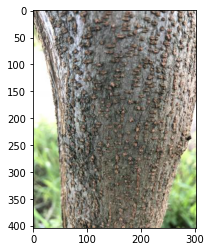

In [ ]:
predict_class(IMG_1) #Final Prediction 


Wrightia religiosa


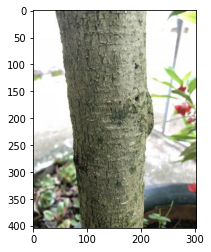

In [ ]:
predict_class(IMG_2)

Eucalyptus


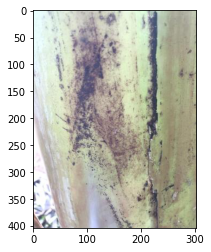

In [ ]:
predict_class(IMG_3)